<img tyle="float: right;"  src="http://minneanalytics.org/wp/wp-content/uploads/2018/04/BDT18_LP-02-02.jpg" \>

# Dask is a flexible parallel computing library for analytics

[link_to_documentation](https://dask.pydata.org/en/latest/)

In [1]:
import dask
import dask.bag as db
import dask.dataframe as dd
from dask.cache import *
from dask.diagnostics import *
from dask.dot import *
import dask.array as da

In [2]:
import matplotlib.style
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime
import pandas as pd
from pandas import *
import unicodedata

In [3]:
%matplotlib inline

In [4]:
cache = Cache(1024 * 1024 * 1024 * 16)
cache.register()

In [5]:
from multiprocessing.pool import ThreadPool
pool = ThreadPool()
dask.set_options(pool=pool)  # set global threadpool
dask.set_options(get=dask.multiprocessing.get)

In [6]:
pbar = ProgressBar()
pbar.register()

In [7]:
files = !ls /media/sf_mnlytics/data -la
files

['total 64569',
 'drwxrwx---. 1 root vboxsf   28672 Jun  6 08:14 .',
 'drwxrwx---. 1 root vboxsf    4096 Jun  4 17:45 ..',
 '-rwxrwx---. 1 root vboxsf   60459 Jun  5 15:24 dot.txt',
 '-rwxrwx---. 1 root vboxsf  969709 Jun  6 07:38 fake_customers_00.csv.gz',
 '-rwxrwx---. 1 root vboxsf  969896 Jun  6 07:38 fake_customers_01.csv.gz',
 '-rwxrwx---. 1 root vboxsf  969686 Jun  6 07:39 fake_customers_02.csv.gz',
 '-rwxrwx---. 1 root vboxsf  968763 Jun  6 07:39 fake_customers_03.csv.gz',
 '-rwxrwx---. 1 root vboxsf  969168 Jun  6 07:40 fake_customers_04.csv.gz',
 '-rwxrwx---. 1 root vboxsf  970397 Jun  6 07:41 fake_customers_05.csv.gz',
 '-rwxrwx---. 1 root vboxsf  970196 Jun  6 07:41 fake_customers_06.csv.gz',
 '-rwxrwx---. 1 root vboxsf  969593 Jun  6 07:42 fake_customers_07.csv.gz',
 '-rwxrwx---. 1 root vboxsf  969622 Jun  6 07:42 fake_customers_08.csv.gz',
 '-rwxrwx---. 1 root vboxsf  969294 Jun  6 07:43 fake_customers_09.csv.gz',
 '-rwxrwx---. 1 root vboxsf 3874029 Jun  6 08:16 fake_cust

In [8]:
filepath = '/media/sf_mnlytics/data/fake_customers_00.csv.gz'
filepaths = '/media/sf_mnlytics/data/fake_customers_*.csv.gz'

# Load Python 'C' compiler 

In [9]:
%load_ext cython

# decorate a python function to compile it to Cython for performance purpose.

In [10]:
%%cython
def pre_process(o):
    return o

In [11]:
head = pd.read_csv(filepath, sep='\t', nrows=1,compression='gzip')
head.head()

,address,age,checking,credit_card_expire,credit_card_full,credit_card_number,credit_card_provider,credit_card_security_code,date_of_birth,first_name,gender,job,last_name,lat,long,saving,ssn,zipcode
0,"7345 Wagner Gateway Suite 629 Patrickside, IA ...",39,5486.1,07/26,VISA 16 digit Elizabeth Smith 4823815298403591...,3554535211664072,Discover,988,09/02/1978,Norma,f,Teaching laboratory technician,Fisher,-19.566711,73.902024,71970468.39,778-26-8050,54263


In [12]:
head = pd.read_csv(filepath, sep='\t', nrows=1,compression='gzip')
head.columns.tolist()
converters = {}
dtypes = {}
for c in head.columns.tolist():
    converters.update({c: pre_process})
    dtypes.update({c: np.str})
kwargs = {
    "dtype": dtypes,
    "low_memory": False,
    'compression': 'gzip',
    'blocksize': None
}
kwargs_1 = {
    "converters": converters,
    "dtype": dtypes,
    "low_memory": False,
    'compression': 'gzip',
    'blocksize': None
}

# Dask to read all the CSV files at once

In [13]:
a = dd.read_csv(filepaths,sep='\t',**kwargs)

In [14]:
b = a.reset_index(drop=True)

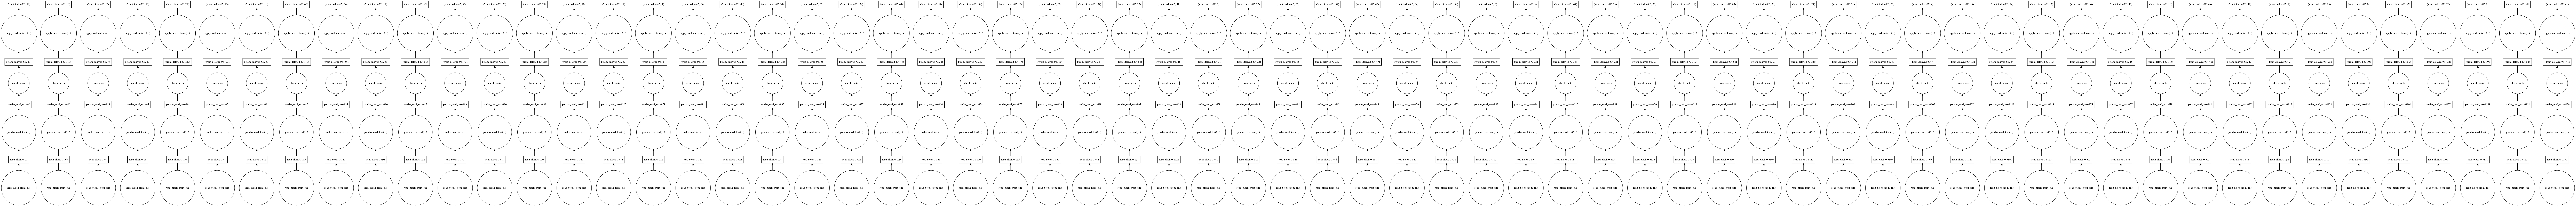

In [15]:
b.visualize(optimize_graph=True)

In [16]:
c = b.compute(optimize_graph=True)

[########################################] | 100% Completed |  5min  2.8s


In [17]:
c.info(verbose=True,memory_usage=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557056 entries, 0 to 8191
Data columns (total 18 columns):
address                      557056 non-null object
age                          557056 non-null object
checking                     557056 non-null object
credit_card_expire           557056 non-null object
credit_card_full             557056 non-null object
credit_card_number           557056 non-null object
credit_card_provider         557056 non-null object
credit_card_security_code    557056 non-null object
date_of_birth                557056 non-null object
first_name                   557056 non-null object
gender                       557056 non-null object
job                          557056 non-null object
last_name                    557056 non-null object
lat                          557056 non-null object
long                         557056 non-null object
saving                       557056 non-null object
ssn                          557056 non-null object
zipcode

In [18]:
c.head()

,address,age,checking,credit_card_expire,credit_card_full,credit_card_number,credit_card_provider,credit_card_security_code,date_of_birth,first_name,gender,job,last_name,lat,long,saving,ssn,zipcode
0,"7345 Wagner Gateway Suite 629 Patrickside, IA ...",39,5486.1,07/26,VISA 16 digit Elizabeth Smith 4823815298403591...,3554535211664072,Discover,988,09/02/1978,Norma,f,Teaching laboratory technician,Fisher,-19.566711,73.902024,71970468.39,778-26-8050,54263
1,"PSC 5954, Box 6997 APO AE 46827-1273",81,6976.4,08/20,Discover Erin Johnson 6565339009112893 08/18 C...,4501913789163,JCB 15 digit,068,02/17/1937,Robin,f,"Engineer, production",Atkinson,17.422451,-20.766948,57386603.91,734-10-1464,25431
2,"38250 Rogers Canyon Apt. 293 West Stacey, NC 7...",88,4144.4,10/24,JCB 15 digit Brandon Griffin 213115457843489 0...,180046327085010,Maestro,829,10/08/1929,Kaitlyn,f,Biomedical scientist,Ortiz,-18.594688,-150.71565,70182962.41,341-87-5681,85425
3,"6382 Billy Rapid Staceyside, VI 77679",81,2078.58,09/21,VISA 13 digit Kristine Higgins 4601923524202 0...,2225893464378960,American Express,9600,01/23/1937,Jodi,f,Psychotherapist,Sparks,-88.5868195,-38.229137,889708.15,576-37-5379,06582
4,"3927 Michael Centers Suite 794 Davidbury, GA 9...",63,9829.14,02/19,VISA 16 digit Tyler Stark 4446262398801274 11/...,4200831169595566,Maestro,797,11/26/1954,Joan,f,Systems analyst,Burns,6.374935,35.501135,40590688.67,492-15-9886,20998


In [19]:
grp = c.groupby(['job'])
grp.job.count()

job
Academic librarian                                  869
Accommodation manager                               853
Accountant, chartered                               855
Accountant, chartered certified                     913
Accountant, chartered management                    871
Accountant, chartered public finance                899
Accounting technician                               872
Actor                                               836
Actuary                                             880
Acupuncturist                                       849
Administrator                                       890
Administrator, Civil Service                        910
Administrator, arts                                 878
Administrator, charities/voluntary organisations    884
Administrator, education                            901
Administrator, local government                     832
Administrator, sports                               883
Adult guidance worker                       

In [20]:
b = c.dropna()

In [21]:
f = b.job.value_counts()

In [22]:
g = f.nlargest(n=5)
g.sort_values()

Artist                           944
Catering manager                 953
Development worker, community    955
Equities trader                  956
Meteorologist                    967
Name: job, dtype: int64

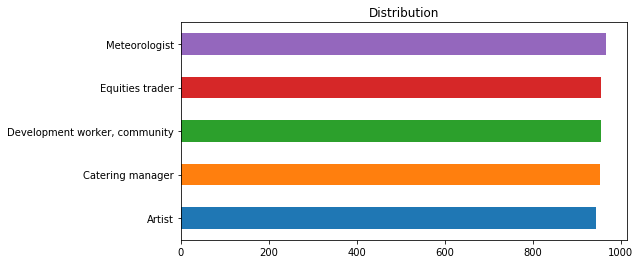

In [23]:
g.sort_values().plot(kind='barh',figsize=(8,4),title='Distribution');

In [24]:
a.dtypes

address                      object
age                          object
checking                     object
credit_card_expire           object
credit_card_full             object
credit_card_number           object
credit_card_provider         object
credit_card_security_code    object
date_of_birth                object
first_name                   object
gender                       object
job                          object
last_name                    object
lat                          object
long                         object
saving                       object
ssn                          object
zipcode                      object
dtype: object

In [25]:
c['saving'] = c.saving.astype(np.float64)
c['checking'] = c.checking.astype(np.float64)

In [26]:
c['long'] = c.long.astype(np.float64)
c['lat'] = c.lat.astype(np.float64)

In [27]:
r = c[c.job=='Therapist, nutritional']

In [28]:
r.head(5)

,address,age,checking,credit_card_expire,credit_card_full,credit_card_number,credit_card_provider,credit_card_security_code,date_of_birth,first_name,gender,job,last_name,lat,long,saving,ssn,zipcode
572,"0957 Jake Ford East Anthony, OK 44101-8185",39,2464.55,08/23,Mastercard Brittany Butler 5420792371488167 11...,376451705935618,JCB 16 digit,524,11/11/1978,Courtney,f,"Therapist, nutritional",Smith,12.420324,63.860806,98807641.31,210-20-2769,14034
1822,"5655 Pamela River Apt. 201 Grimesland, OK 9000...",72,1160.76,04/22,VISA 13 digit Brittney Kennedy 4947793644871 0...,4602981469389,VISA 13 digit,490,08/10/1945,Scott,m,"Therapist, nutritional",Weber,34.081035,13.807948,98146875.34,752-75-0566,23594
1990,79618 Henderson Circles Suite 520 South Ashley...,71,8790.40,03/25,American Express Rebecca Donovan 3408467431055...,3571952052986663,JCB 15 digit,428,05/25/1947,Jane,f,"Therapist, nutritional",Smith,24.156496,13.195795,74116542.50,174-58-0366,91996
2121,"940 Smith Pines Suite 336 Simsville, ME 17827-...",70,5363.52,10/24,Discover Aaron Jones 6011766818784290 12/25 CV...,6011063037329747,Discover,290,06/14/1947,Johnny,m,"Therapist, nutritional",Mckenzie,-14.779621,146.992571,63355897.23,011-41-6365,89904
2599,"55744 Smith Tunnel Apt. 468 Karenborough, OH 9...",54,2708.52,01/27,JCB 15 digit Lori Douglas 213137903770215 03/2...,213108136668286,JCB 15 digit,919,03/21/1964,Cody,m,"Therapist, nutritional",Powell,-10.488145,-17.951234,10689989.53,086-92-7421,39073


In [29]:
r_0 = r[r.checking > 9000]
r_0.head(5)

,address,age,checking,credit_card_expire,credit_card_full,credit_card_number,credit_card_provider,credit_card_security_code,date_of_birth,first_name,gender,job,last_name,lat,long,saving,ssn,zipcode
1918,"42860 James Loaf Apt. 438 South Savannah, OK 2...",44,9864.93,01/27,Diners Club / Carte Blanche Roger Christensen ...,30447198432822,Diners Club / Carte Blanche,710,01/06/1974,Henry,m,"Therapist, nutritional",Reyes,37.401494,-96.821539,12054444.73,750-55-4998,21773
3642,"55808 Ryan Creek Suite 273 East Matthew, AL 95603",58,9662.39,10/26,JCB 16 digit Jasmine Golden 3552558713082405 0...,3578462560554857,JCB 16 digit,900,01/06/1960,Richard,m,"Therapist, nutritional",Le,-83.128662,-64.211067,33536790.60,302-12-8118,99535
5215,"576 Moore Burg Oliviaside, OR 83821",72,9494.49,07/20,Discover Greg Huff 6533692002321617 01/27 CVC:...,6555057805384712,Discover,676,11/11/1945,Phillip,m,"Therapist, nutritional",Cruz,57.295091,61.398676,59968293.49,610-42-7722,08759
6774,"931 Benson Prairie Port Carol, AZ 96377-6179",53,9979.15,06/19,VISA 13 digit Abigail Martinez 4697317250651 0...,3570154753499770,Maestro,002,11/17/1964,Leslie,f,"Therapist, nutritional",Rodriguez,80.848395,-32.186443,52078236.82,817-21-1108,50372
397,"248 Thomas Prairie Apt. 821 Lake Hannahland, W...",60,9059.10,11/25,VISA 13 digit Kelly Hall 4945598644393 02/23 C...,4842920107001,JCB 16 digit,717,02/20/1958,Nancy,f,"Therapist, nutritional",Barton,-28.070030,17.552373,64447684.10,611-14-9103,51708


In [30]:
locations = list(zip(r.lat, r.long))
popups = ['{}'.format(loc) for loc in locations]

In [31]:
import folium
from folium.plugins import MarkerCluster
m = folium.Map(tiles='Cartodb Positron', zoom_start=1)
m.add_child(MarkerCluster(locations=locations, popups=popups))
m